In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


it is a classification problem we want to predict income 

In [4]:
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

we can see that data types are both object and int

In [7]:
# checking the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

no null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#checking for categorical col
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
           categorical_col.append(i)
print("Categorical columns: ",categorical_col)
print("\n")


#checking for Numerical col
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
           numerical_col.append(i)
print("Numerical columns: ",numerical_col)
print("\n")

Categorical columns:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




In [10]:
#checking the number of unique  values in each column
df.nunique().to_frame("No of unique values")

,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [11]:
#checking the list of counts of target
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

The target column has 2 unique values '<=50k' and '>50k'

In [12]:
#checking the unique values of target
df["Income"].value_counts()

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

the dataset is imbalanced the difference between <=50k and >50k are huge

# Description of Dataset

In [13]:
#statistical summary of numerical columns
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


we can observe huge difference between 75% and max there are outliers in data ..
we can see skewees also present in data

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64


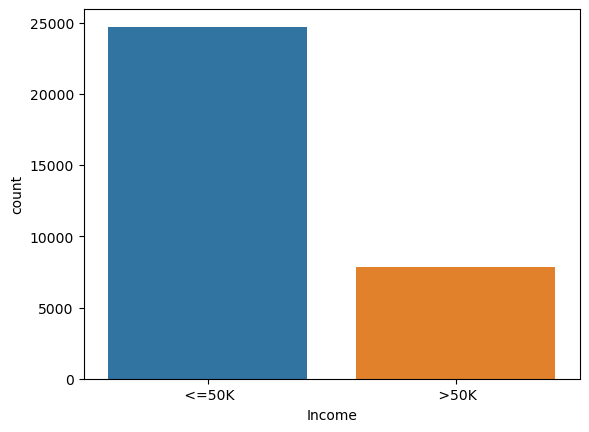

In [14]:
#visualize the number of Income columns
ax=sns.countplot(x="Income",data=df)
print(df['Income'].value_counts())

<Axes: xlabel='Age', ylabel='Density'>

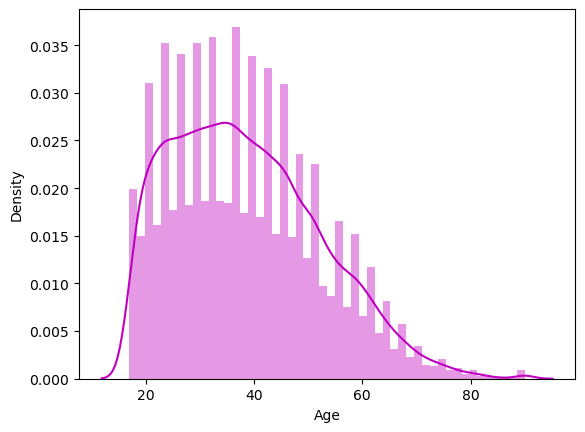

In [15]:
#age distribution
sns.distplot(df['Age'], color="m")

age feature has slightly rightskewed in data.outliers are present

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


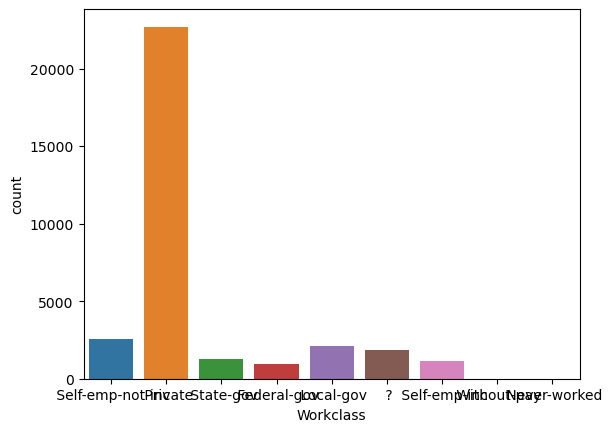

In [16]:
#visualize the number of exited columns
ax=sns.countplot(x="Workclass",data=df)
print(df['Workclass'].value_counts())

private work are more people

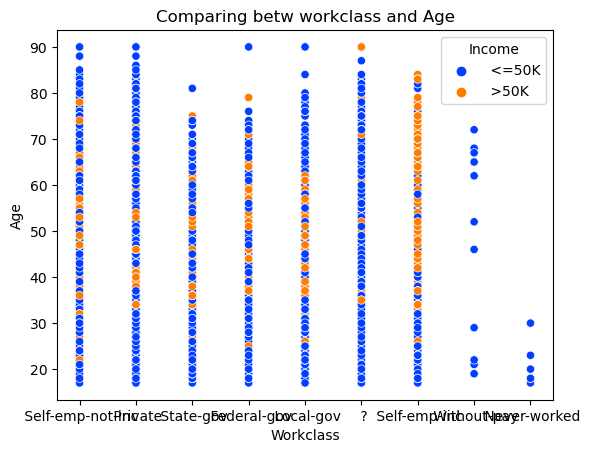

In [17]:
#comparing workclass with Age
plt.title("Comparing betw workclass and Age")
sns.scatterplot(x="Workclass", y="Age", data=df, hue="Income", palette="bright")
plt.show()

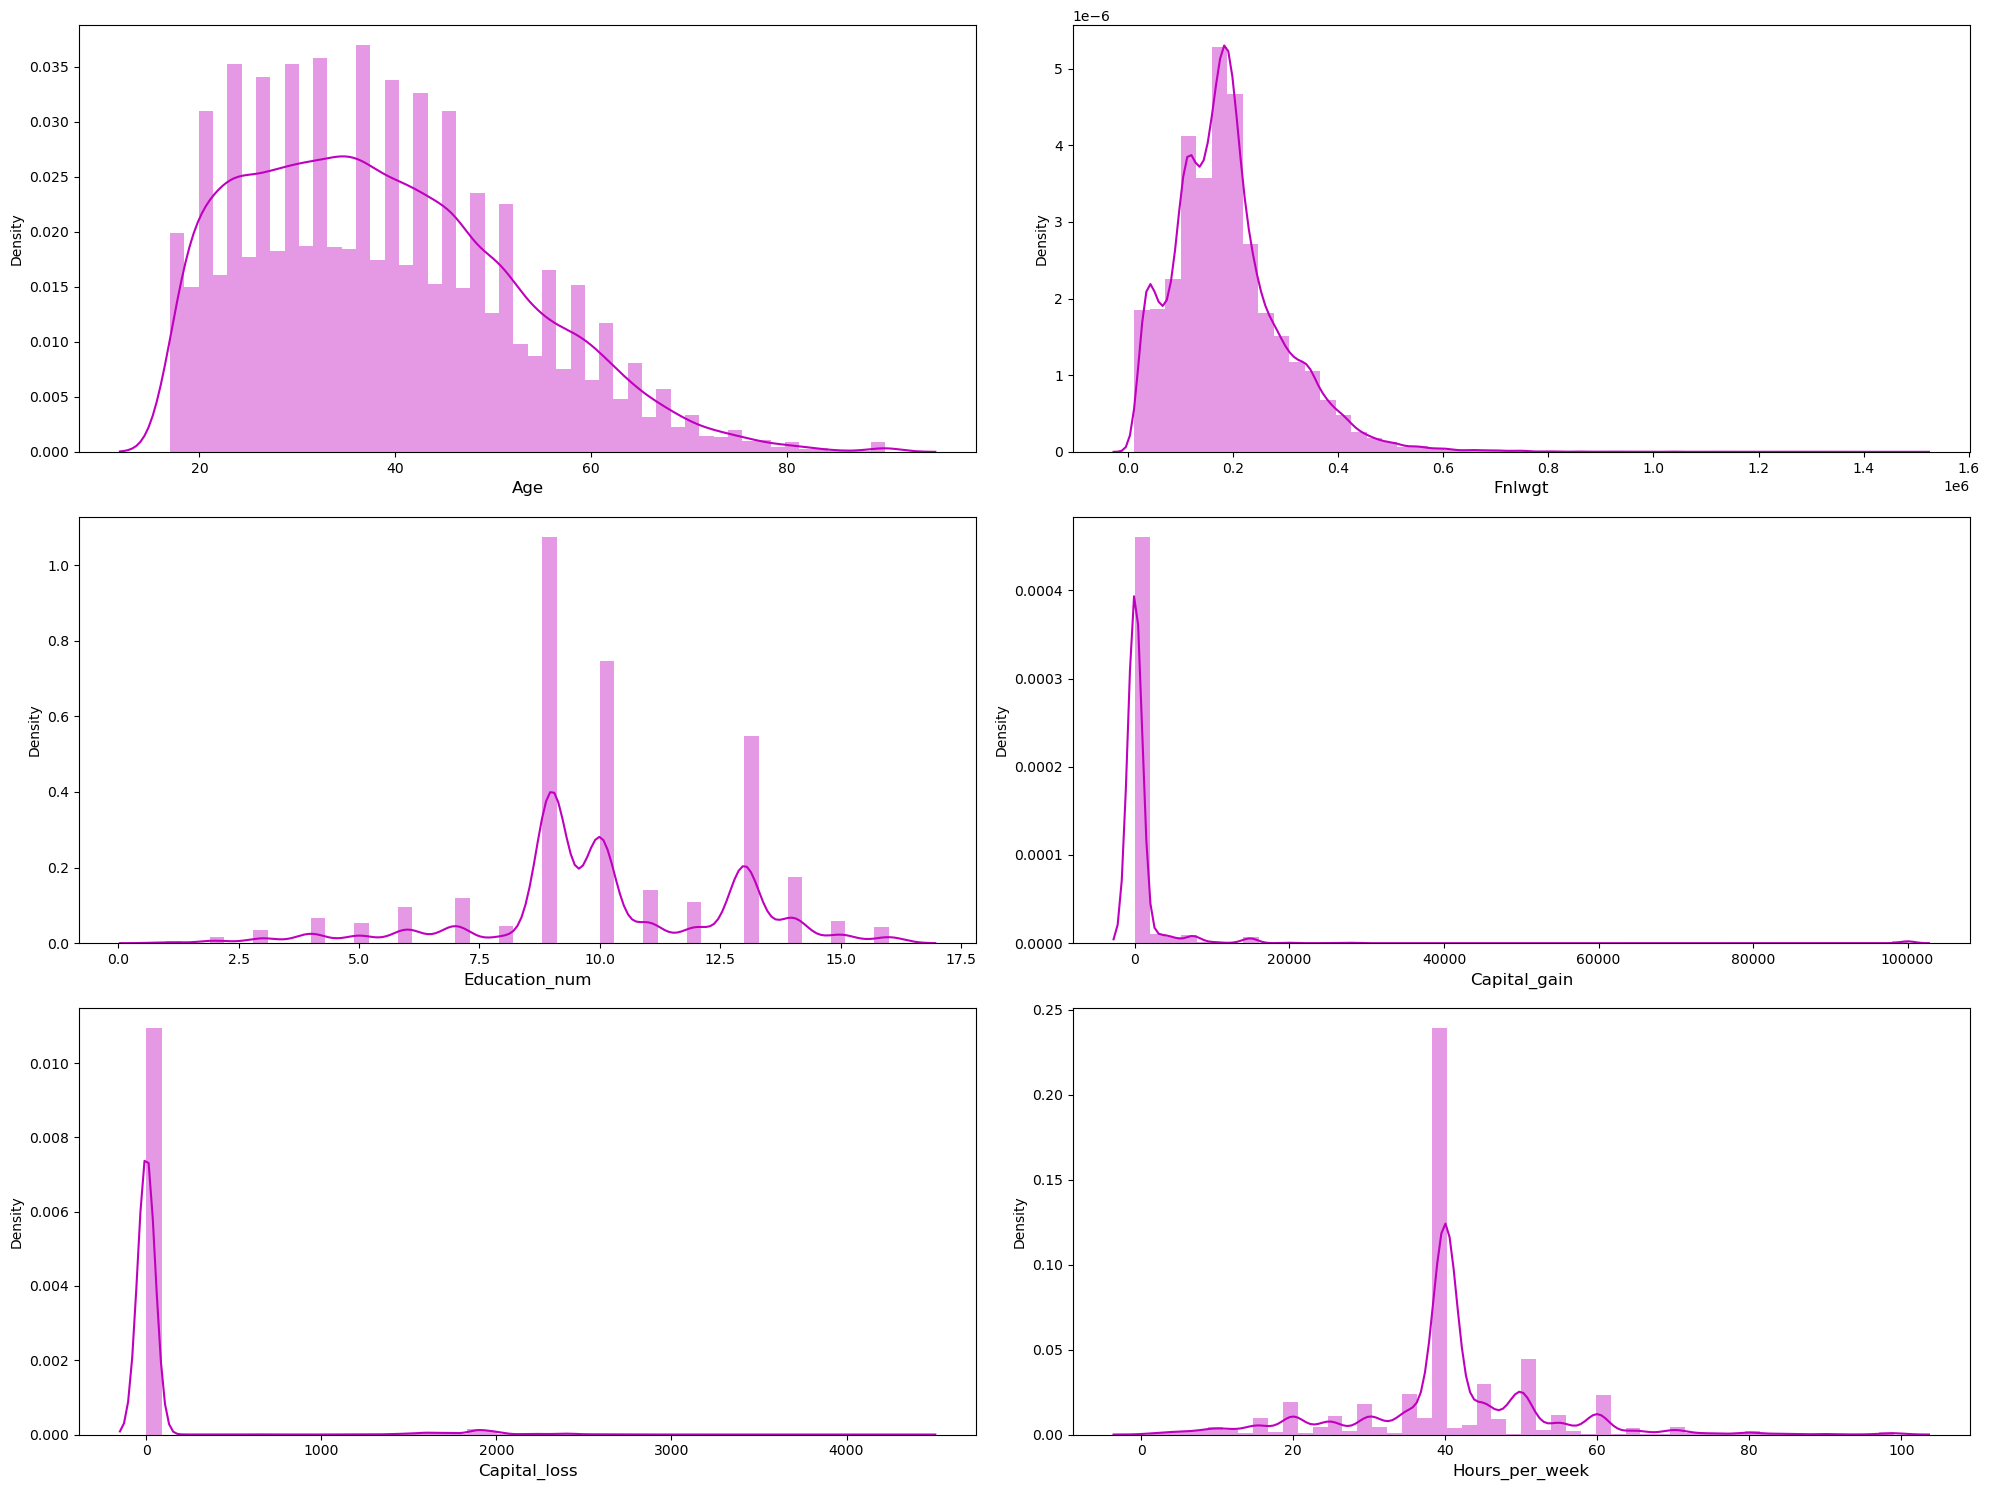

In [18]:
#lets check how data hss been distributed in remaing column-checking the column with inthe column
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1#iteration or index value
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2, plotnumber)#subplot is used to plot diff plot on single image
        sns.distplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()   

there is a skewness in all the columns

Detecting outliers

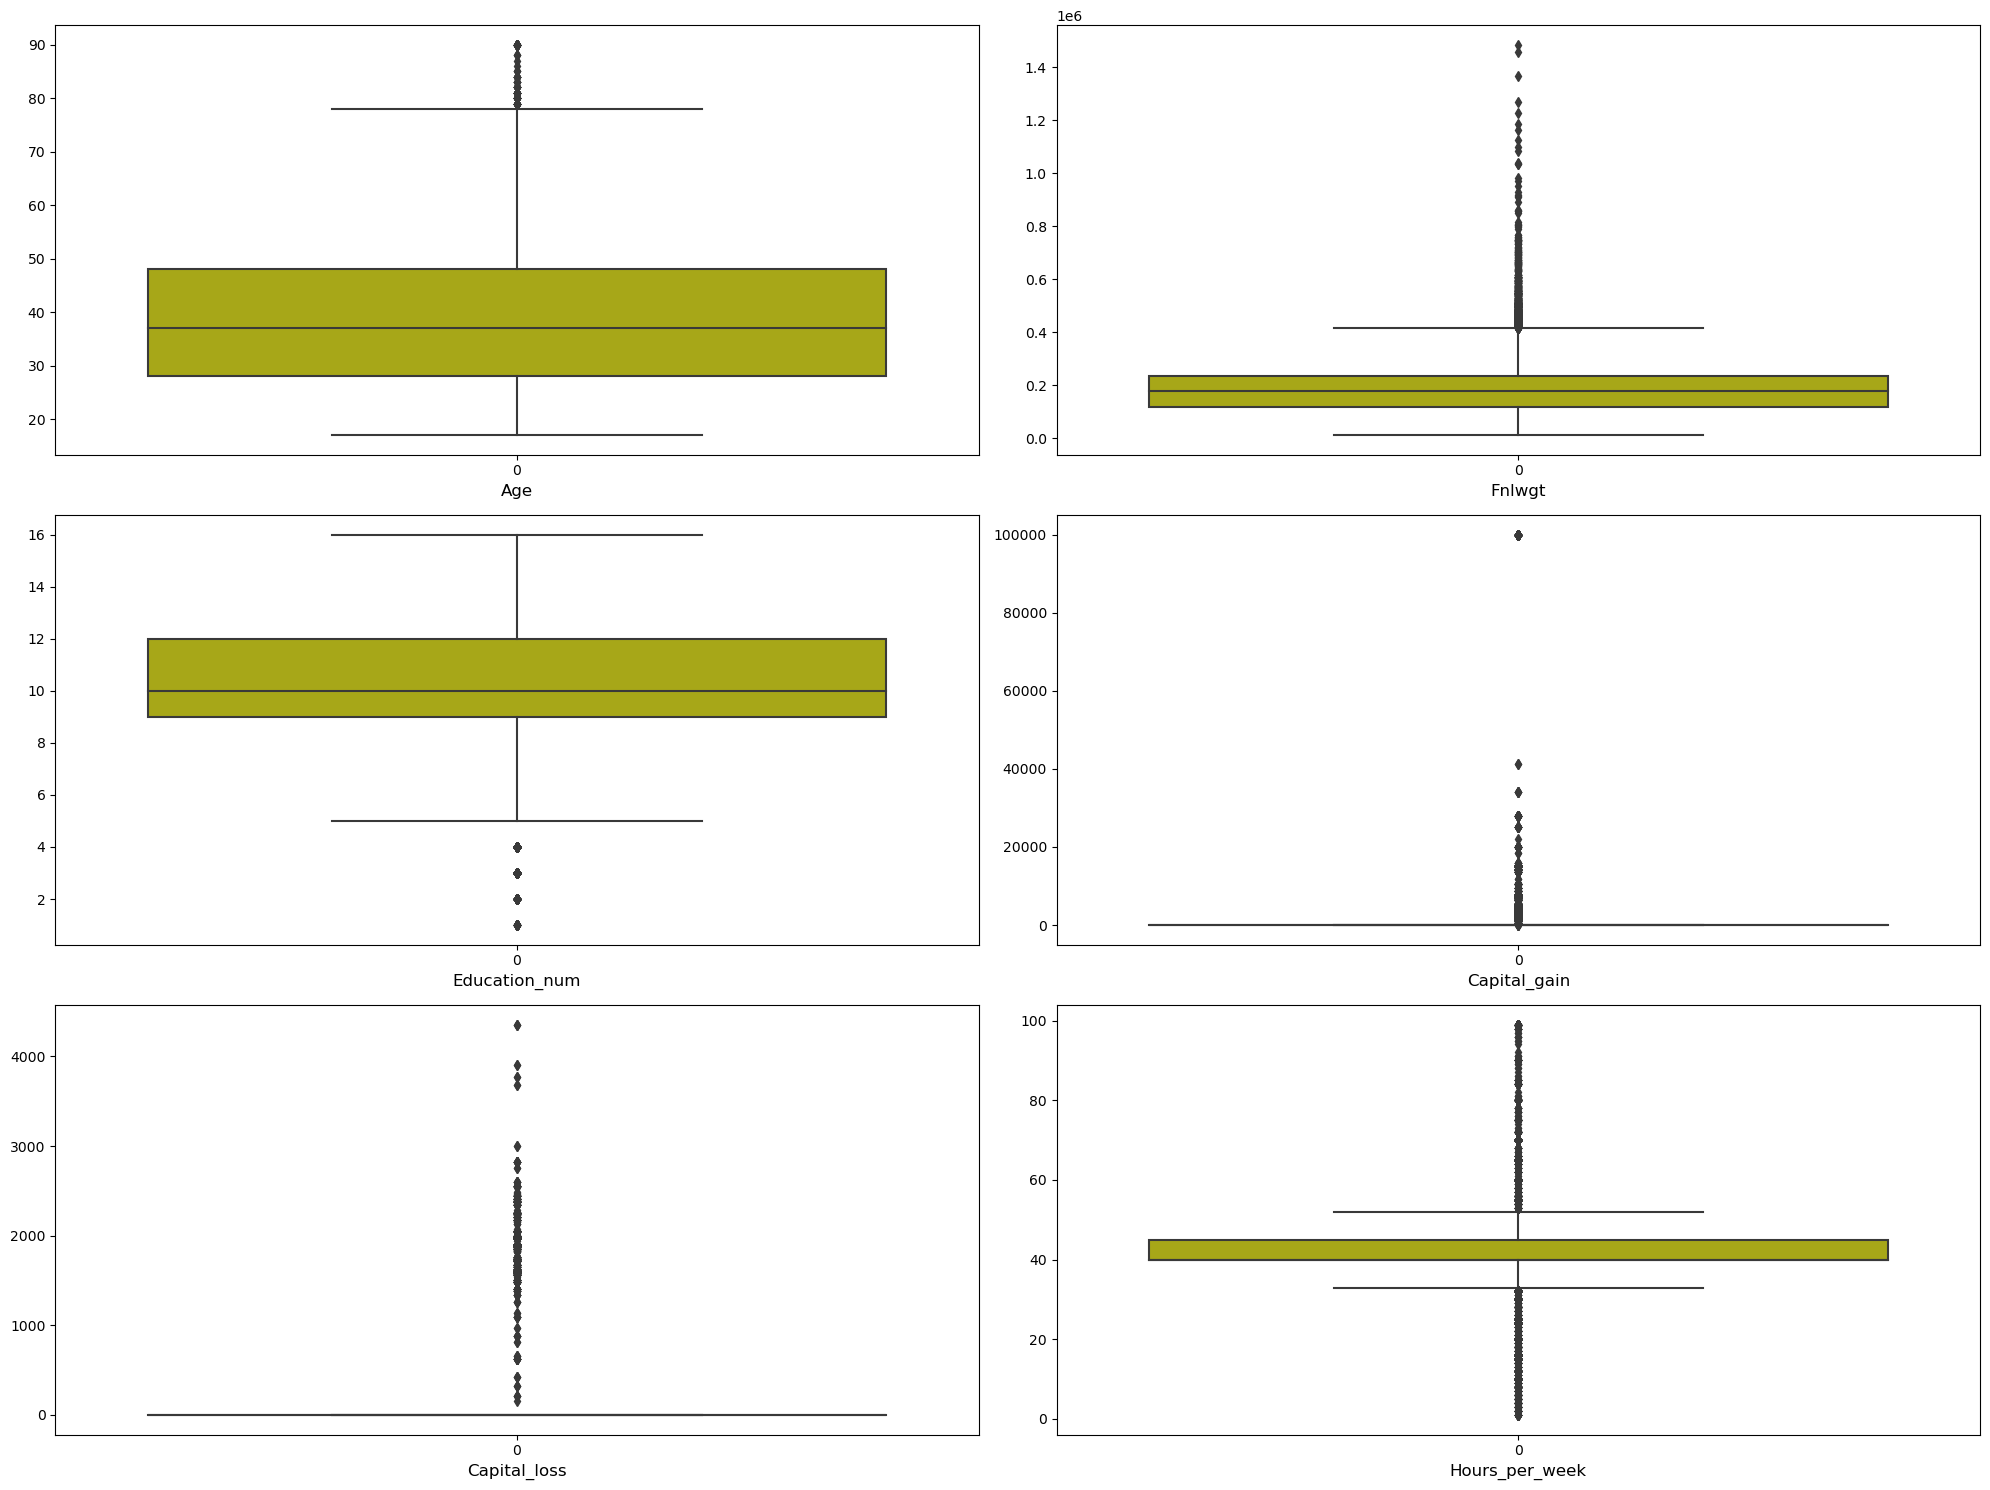

In [19]:
#lets check the outliers using box plot
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2, plotnumber)
        sns.boxplot(df[col], color="y")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()   

the outliers are present in all the columns

Removing outliers

In [20]:
#REMOVING THE OUTLIERS DATA BY USING Z SCORE METHOD
from scipy.stats import zscore
z=np.abs(zscore(df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]))

z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.008742,1.134779,0.145914,0.216663,2.222120
1,0.042640,0.245046,0.420027,0.145914,0.216663,0.035430
2,1.057031,0.425770,1.197429,0.145914,0.216663,0.035430
3,0.775755,1.408146,1.134779,0.145914,0.216663,0.035430
4,0.115952,0.898170,1.523480,0.145914,0.216663,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.145914,0.216663,0.197407
32556,0.103982,0.335466,0.420027,0.145914,0.216663,0.035430
32557,1.423589,0.358811,0.420027,0.145914,0.216663,0.035430
32558,1.215624,0.110927,0.420027,0.145914,0.216663,1.655200


In [21]:
#threesold=3
np.where(z>3)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [22]:
z.iloc[9,5]

3.2041109525634903

In [23]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(29827, 15)

In [24]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 32560
new data frame.-- 29827


In [25]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 8.393734643734643


In [26]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
df=df1

# Encoding -- coverting object data into numerical ones 

In [28]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,8.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,4.0,215646,10.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,4.0,338409,8.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,11.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,6.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,4.0,154374,10.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,4.0,151910,10.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,4.0,201490,10.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,38.0,0.0


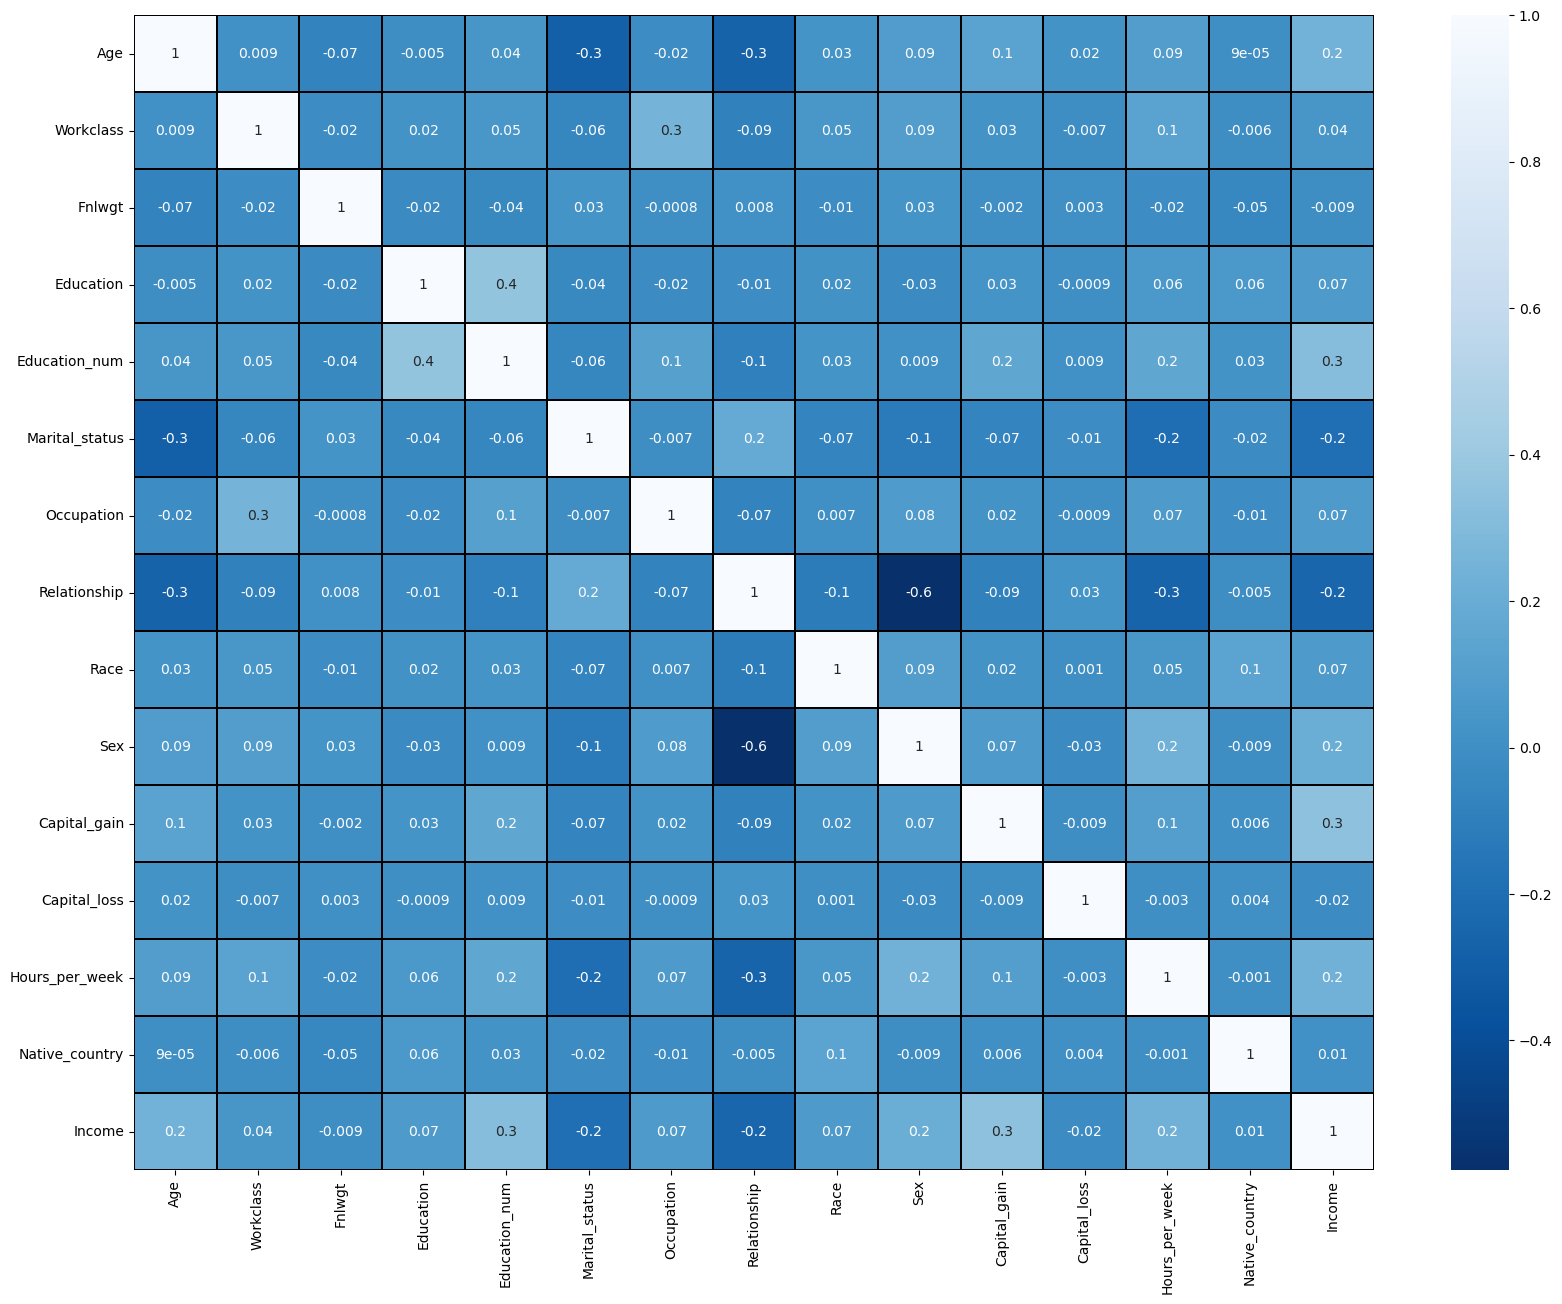

In [29]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

1)we can see that relationship and sex are highly correlated with eachother. Remaining all in range

# Seperating the label and features

In [30]:
x=df.drop('Income', axis=1)
y=df["Income"]

In [31]:
print(x.shape)
print(y.shape)

(29827, 14)
(29827,)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)#

In [33]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887615,1.475129,-1.077638,-0.340349,1.191339,-0.410521,-0.603082,-0.919032,0.393963,0.716230,-0.244441,-0.036972,-2.414481,0.286723
1,-0.010760,0.093565,0.322068,0.249294,-0.439450,-1.731049,-0.130823,-0.297840,0.393963,0.716230,-0.244441,-0.036972,0.009327,0.286723
2,1.112209,0.093565,0.523824,-2.404103,-1.254844,-0.410521,-0.130823,-0.919032,-1.957360,0.716230,-0.244441,-0.036972,0.009327,0.286723
3,-0.759406,0.093565,1.620531,-0.340349,1.191339,-0.410521,0.813697,2.186928,-1.957360,-1.396199,-0.244441,-0.036972,0.009327,-4.107840
4,-0.085625,0.093565,1.051204,0.544116,1.599037,-0.410521,-0.603082,2.186928,0.393963,-1.396199,-0.244441,-0.036972,0.009327,0.286723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29822,-0.834271,0.093565,0.762663,-0.929993,0.783642,-0.410521,1.522086,2.186928,0.393963,-1.396199,-0.244441,-0.036972,-0.170214,0.286723
29823,0.138969,0.093565,-0.326005,0.249294,-0.439450,-0.410521,0.105307,-0.919032,0.393963,0.716230,-0.244441,-0.036972,0.009327,0.286723
29824,1.486532,0.093565,-0.352067,0.249294,-0.439450,2.230536,-1.311471,1.565736,0.393963,-1.396199,-0.244441,-0.036972,0.009327,0.286723
29825,-1.208594,0.093565,0.172340,0.249294,-0.439450,0.910008,-1.311471,0.944544,0.393963,0.716230,-0.244441,-0.036972,-1.786086,0.286723


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.180122,Age
1,1.088174,Workclass
2,1.011265,Fnlwgt
3,1.162521,Education
4,1.223424,Education_num
5,1.137288,Marital_status
6,1.089081,Occupation
7,1.673556,Relationship
8,1.037572,Race
9,1.548620,Sex


all vif values are in range

# DATA MODELLING

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings 
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [36]:
#finding best random_state
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.8379707229858084 at random_state 70


creating train test split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.27, random_state=maxRS)

In [38]:
models={
         "AdaBoostClassifier":AdaBoostClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),"BaggingClassifier":BaggingClassifier(),
           "RandomForestClassifier":RandomForestClassifier(),
             "support vector mach":SVC(),"Decision tree classifier":DecisionTreeClassifier()
       }
                                
for i in range(len(list(models))):
       model= list(models.values())[i]
       model.fit(x_train,y_train)#train model
        
        # making predictions
       y_train_pred = model.predict(x_train)
       y_test_pred =model.predict(x_test)
        
        
        #Training set performance
       model_train_accuracy = accuracy_score(y_train,y_train_pred)
       model_train_f1    =   f1_score(y_train,y_train_pred)
       model_train_precision = precision_score(y_train,y_train_pred)
       model_train_recall =   recall_score(y_train,y_train_pred)
      
       #model_train_classification_report= classification_report(y_train,y_train_pred) 
                                        
                                        
          #Test set performance
       model_test_accuracy = accuracy_score(y_test,y_test_pred)
       model_test_f1    =   f1_score(y_test,y_test_pred)
       model_test_precision = precision_score(y_test,y_test_pred)
       model_test_recall =   recall_score(y_test,y_test_pred)
                                 
                                        
                                        
       print(list(models.keys())[i]) 
                                        
                                        
       print("Model performance for Training set")
       print("-- Accuracy: {:.4f}".format(model_train_accuracy))       
       print("-- F1: {:.4f}".format(model_train_f1))                                 
       print("-- Precision: {:.4f}".format(model_train_precision))                                 
       print("-- Recalll: {:.4f}".format(model_train_recall))                                 
      
                                     
                                     
                                        
                                        
       print("Model performance for Test set")
       print("-- Accuracy: {:.4f}".format(model_test_accuracy))       
       print("-- F1: {:.4f}".format(model_test_f1))                                 
       print("-- Precision: {:.4f}".format(model_test_precision))                                 
       print("-- Recalll: {:.4f}".format(model_test_recall))                                 
       
                                        
       print('-'*30) 
       print("\n")   

AdaBoostClassifier
Model performance for Training set
-- Accuracy: 0.8586
-- F1: 0.6382
-- Precision: 0.7476
-- Recalll: 0.5568
Model performance for Test set
-- Accuracy: 0.8633
-- F1: 0.6454
-- Precision: 0.7540
-- Recalll: 0.5642
------------------------------


GradientBoostingClassifier
Model performance for Training set
-- Accuracy: 0.8664
-- F1: 0.6568
-- Precision: 0.7741
-- Recalll: 0.5703
Model performance for Test set
-- Accuracy: 0.8688
-- F1: 0.6576
-- Precision: 0.7742
-- Recalll: 0.5715
------------------------------


BaggingClassifier
Model performance for Training set
-- Accuracy: 0.9868
-- F1: 0.9699
-- Precision: 0.9921
-- Recalll: 0.9487
Model performance for Test set
-- Accuracy: 0.8437
-- F1: 0.6047
-- Precision: 0.6835
-- Recalll: 0.5422
------------------------------


RandomForestClassifier
Model performance for Training set
-- Accuracy: 1.0000
-- F1: 0.9999
-- Precision: 0.9998
-- Recalll: 1.0000
Model performance for Test set
-- Accuracy: 0.8562
-- F1: 0.642

In [39]:
models=[LogisticRegression(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC(),BaggingClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [44]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('Mean Accuracy  of the', model, '=', mean_accuracy,'%')
        print('Difference between accuracy score and cross validatio score for', model, '=', accuracy_score(y_test,y_test_pred
        )-abs(cv_score.mean()))
        print('-'*30) 
        print("\n") 

In [45]:
compare_models_cross_validation()

Cross Validation Score for the LogisticRegression() = [0.82651693 0.82852833 0.83084661 0.83034367 0.83067896]
Mean Accuracy  of the LogisticRegression() = 82.93828987340672 %
Difference between accuracy score and cross validatio score for LogisticRegression() = -0.018978130916833424
------------------------------


Cross Validation Score for the AdaBoostClassifier() = [0.8516594  0.85316795 0.86253143 0.86487846 0.85884325]
Mean Accuracy  of the AdaBoostClassifier() = 85.82160996695721 %
Difference between accuracy score and cross validatio score for AdaBoostClassifier() = -0.047811331852338435
------------------------------


Cross Validation Score for the GradientBoostingClassifier() = [0.85903453 0.85987261 0.86621961 0.87057837 0.86219614]
Mean Accuracy  of the GradientBoostingClassifier() = 86.35802545803702 %
Difference between accuracy score and cross validatio score for GradientBoostingClassifier() = -0.05317548676313644
------------------------------


Cross Validation Score 

logistic regression is the best model gives accuracy== 82.93

Hyper Parameter Tuningwith LogisticrRegression 

In [48]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1],'multi_class':['auto'],'max_iter':[10,50,100]}
LR=LogisticRegression()

clf = GridSearchCV(LogisticRegression(),parameters, cv=5)
clf.fit(x_train, y_train)
clf.best_params_  #Best parameters

{'fit_intercept': True, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': -1}

In [51]:
best_model = LogisticRegression(fit_intercept=True,n_jobs=-1,multi_class='auto',max_iter=50)
best_model.fit(x_train,y_train)
y_train_pred = best_model.predict(x_train)
y_test_pred =best_model.predict(x_test)
print(accuracy_score(y_test,y_test_pred)*100)

83.72237397566427


after performing hyperparameter tuning the accuarcy increased 82.99 to 83.72

PLOTTING ROC AND compare AUC FOR ALL MODELS

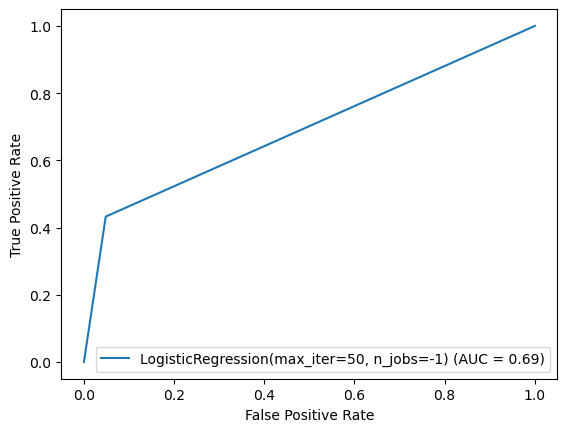

In [54]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics
fpr,tpr, thresholds=metrics.roc_curve(y_test, y_test_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_model)
display.plot()

In [56]:
#saving model using .pkl
import joblib
joblib.dump(best_model,"celsus.pkl")

['celsus.pkl']